In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#                 **Campus Recruitment Data Analysis**
In this Note we use the data provided by Ben Rosan D on campus recruitment process and try to solve the question arise from the dataset.
These Questions are
1. Which factor influenced a candidate in getting placed?
1. Does percentage matters for one to get placed?
1. Which degree specialization is much demanded by corporate?

In addition the these given questions there are some questions we have to solve these are
1. Classification of Test data into Placed or Not Placed Category.
1. Is there any correlation between the different exams percentage with each other (one to one) and with salary

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Importing the Libraries

In [3]:
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as py
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly.offline import plot

Reading the Dataset

In [4]:
df = pd.read_csv("/content/drive/My Drive/pl.csv")
df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
placed=df.dropna()
N_placed=df[df["status"]=="Not Placed"]

In [6]:
placed.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


In [7]:
N_placed.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN


**Visualisation**

Text(0.5, 1.0, 'Not Placed Student')

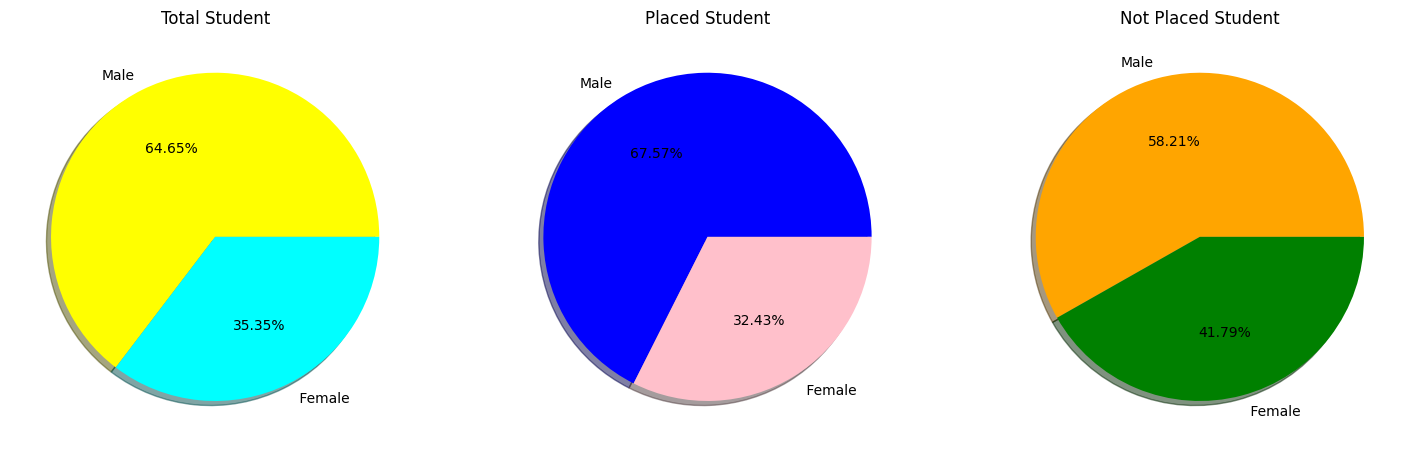

In [8]:
fig=plt.figure(figsize=(18,10))
plt.subplot(1,3,1)
plt.pie(df["gender"].value_counts(),labels={"Male"," Female"},colors={"cyan", "yellow"},
        shadow=True,autopct = '%.2f%%')
plt.title("Total Student")
plt.subplot(1,3,2)
plt.pie(placed["gender"].value_counts(),labels={"Male"," Female"},colors={"blue", "pink"},
        shadow=True,autopct = '%.2f%%')
plt.title("Placed Student")
plt.subplot(1,3,3)
plt.pie(N_placed["gender"].value_counts(),labels={"Male"," Female"},colors={"green", "orange"},
        shadow=True,autopct = '%.2f%%')
plt.title("Not Placed Student")

From the above pie charts we can conclude the following points-
* Male Students have a higher number of placed students in the aspect of their representation in the  total population.
* Female Students have a lower number of placed students in the aspects of their representation in the total population.

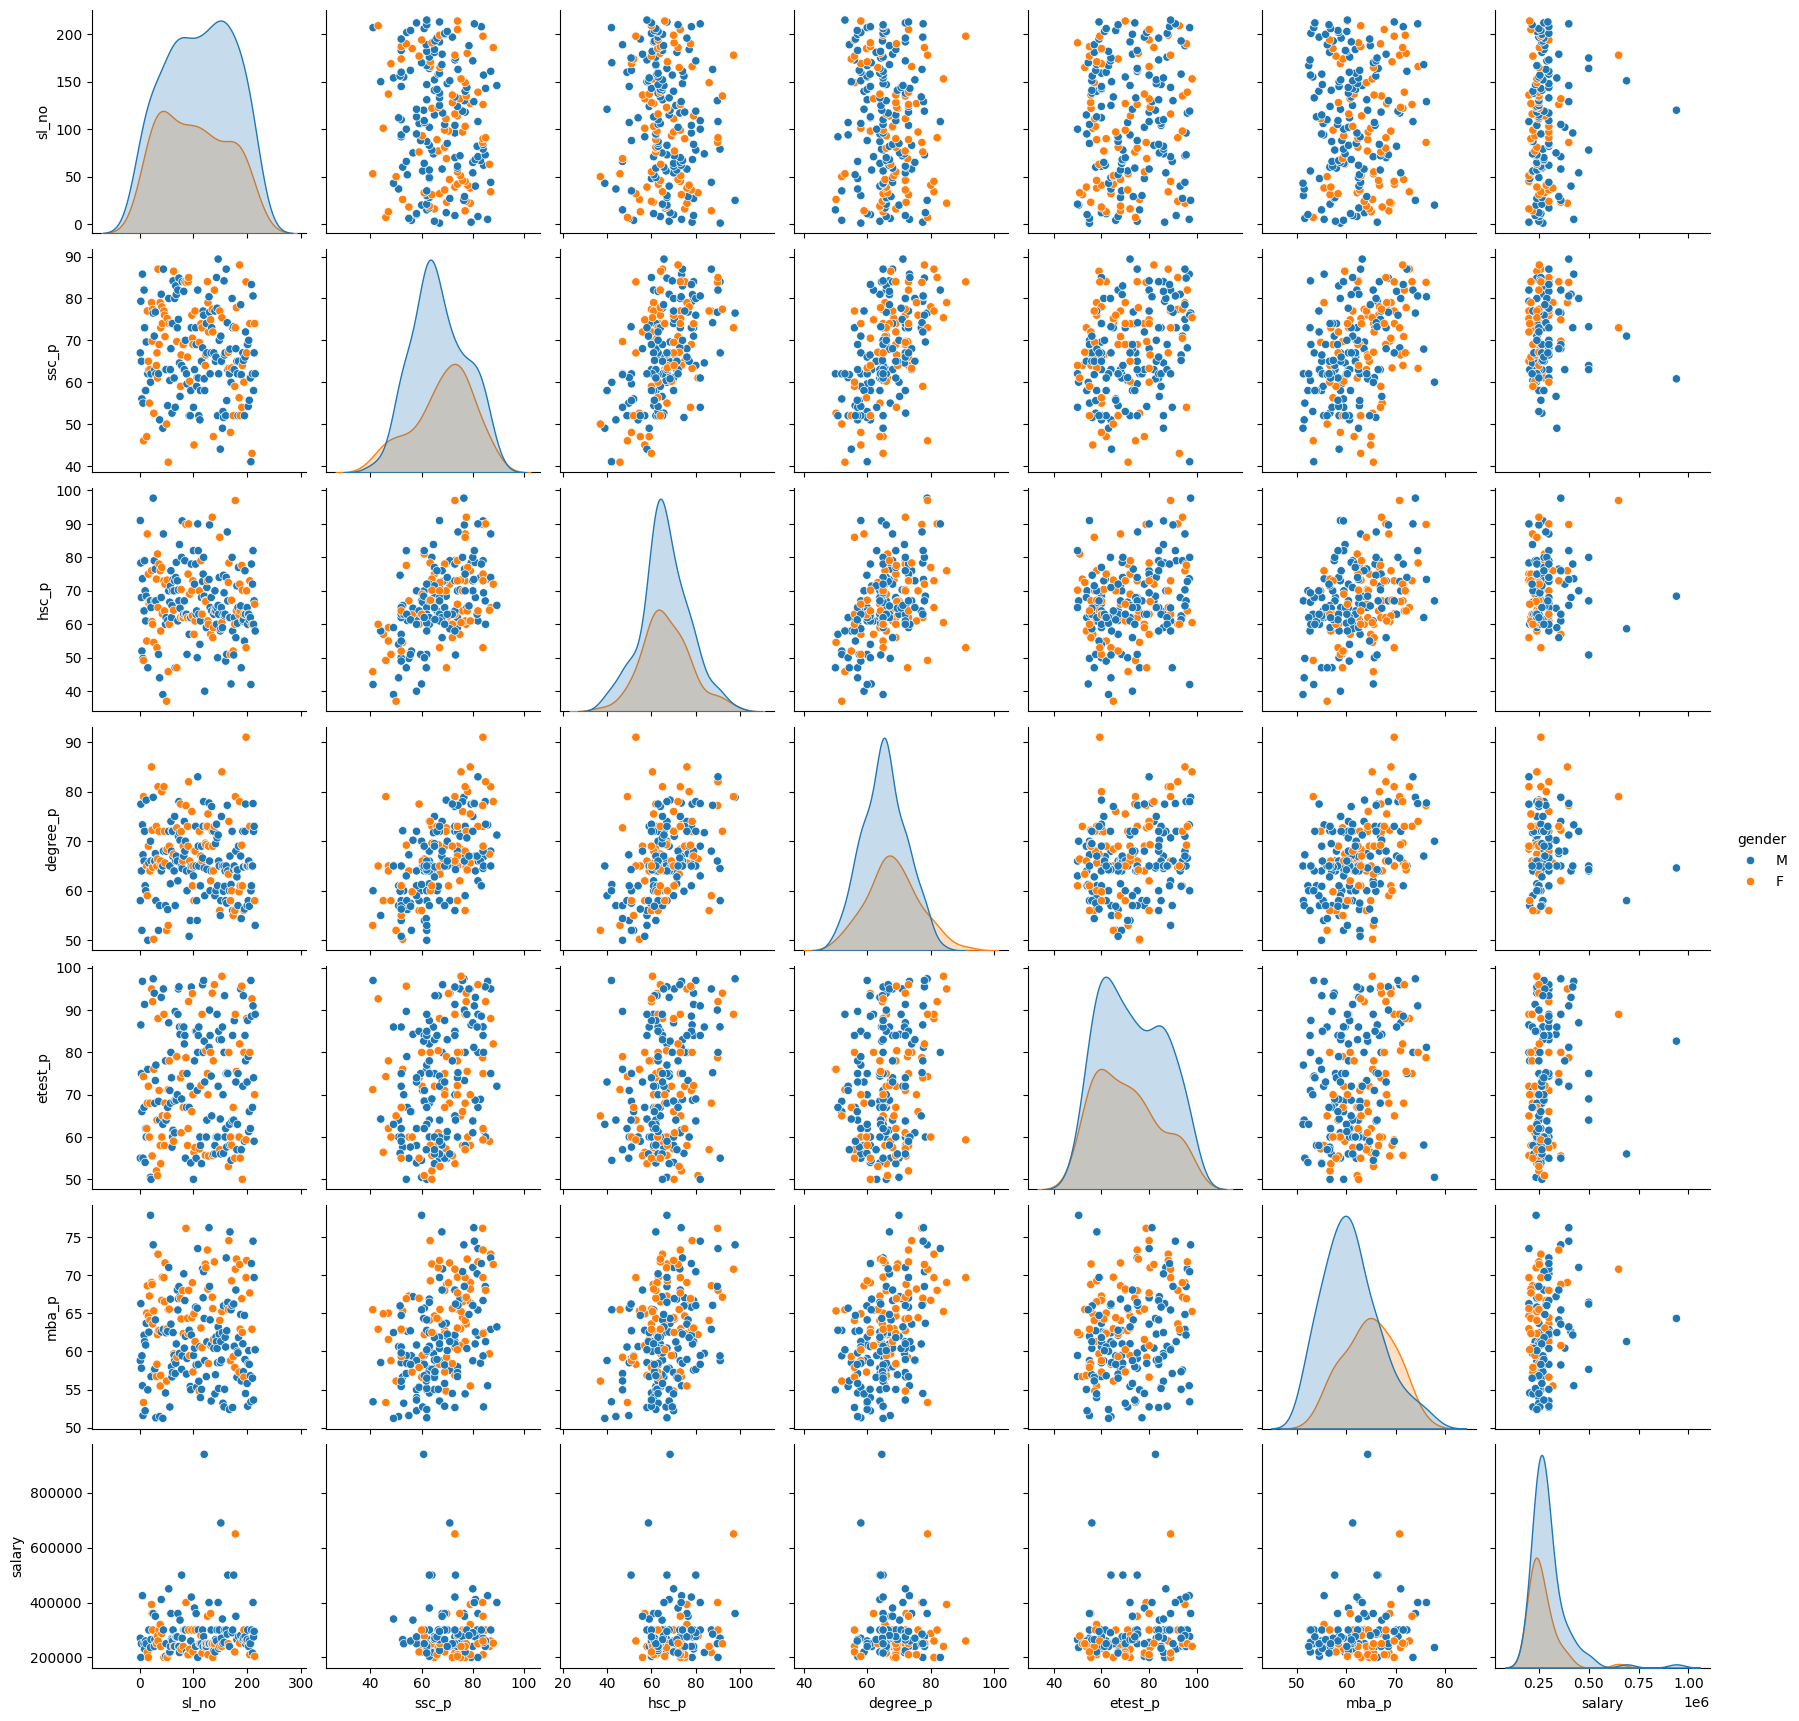

In [9]:
sns.pairplot(data=df,kind="scatter",hue="gender")

In the above pairplot we can concludes the following points-
* Mean of ssc percentage is around 60% for Male students and around 80% for Female students.
* Mean of hsc percentage is around 60% for Male students and around 60% for Female students.
* Mean of degree percentage is around 60% for Male students and around 65% for Female students.
* Mean of mba percentage is around 55% for Male students and around 65% for Female students.
* Mean of Entrance Test  percentage is around 55% for Male students and around 55% for Female students.
There is positive correlation between the different exam percentage.
There is not any correlation between salary and exam percentage.
We can also see that the mean average salary of male students are higher than mean average salary of female students.

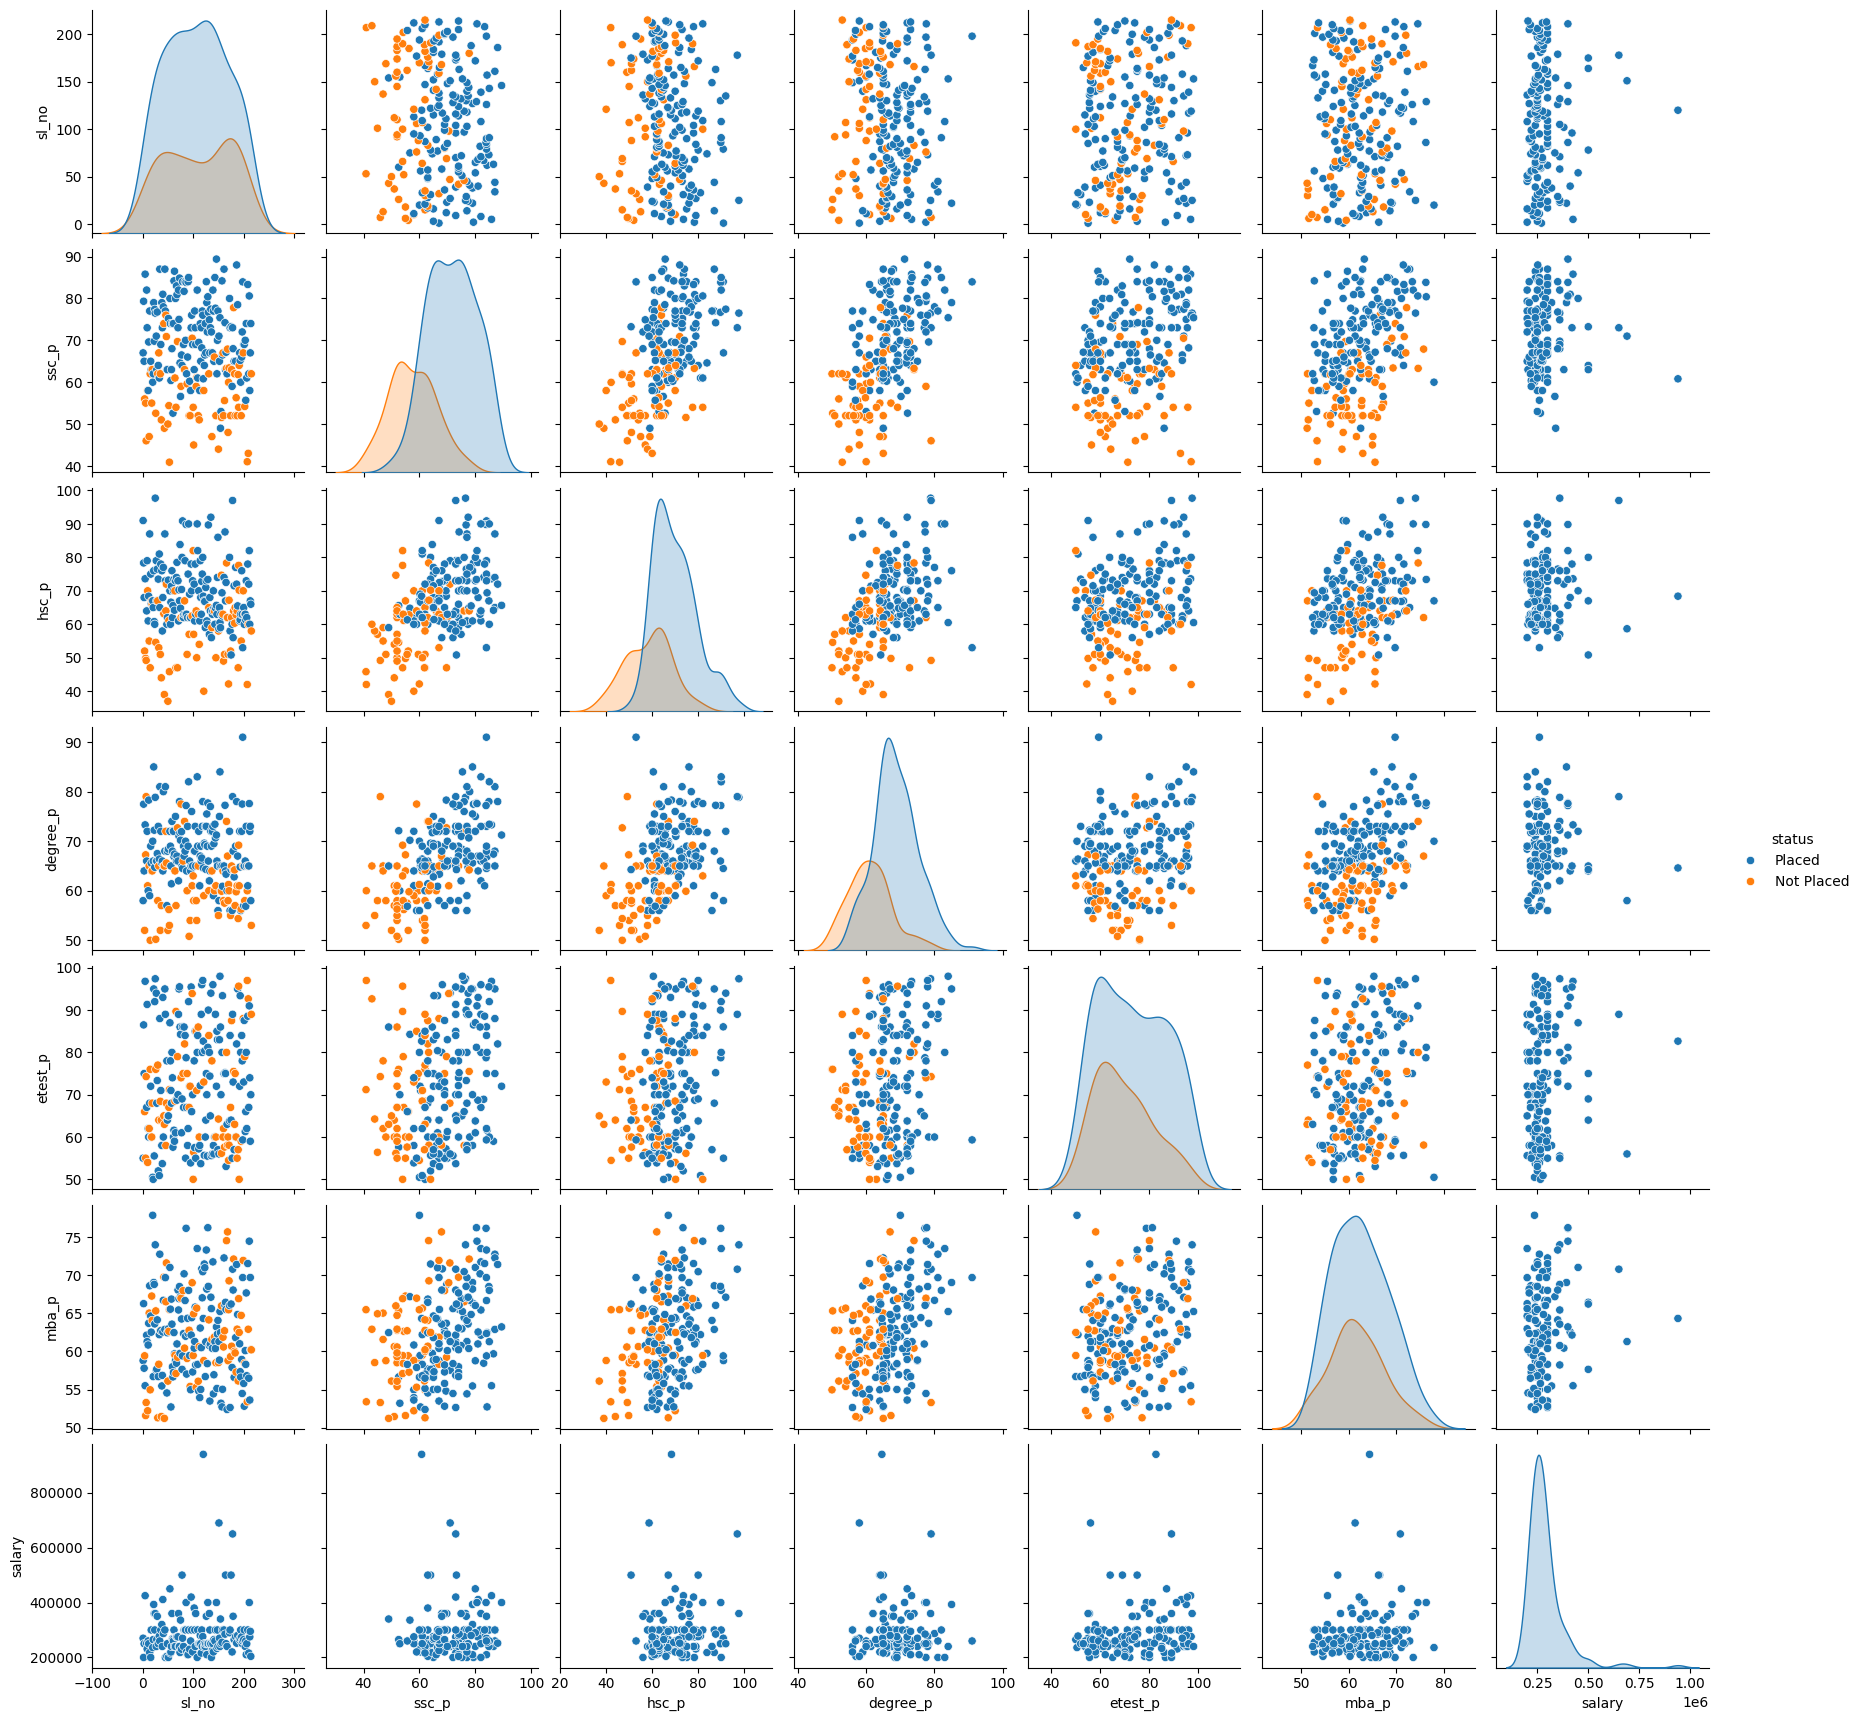

In [10]:
sns.pairplot(data=df,kind="scatter",hue="status")

From the above pair plot we can conclude that those students who consistently score lower percentages in their different examinations are not placed. It is strongly evident in the SSC, HSC  and Degree percentage but in Etest and Mba there is not good evidence to support the claim.

In [11]:
gen=px.scatter_3d(df,x="ssc_p",y="hsc_p",z="degree_p",color="status")
iplot(gen)

In the above 3d plot the same information can be extracted that in the Not placed students there are more numbers of the students who scored less than 60 percentage in their SSC,HSC and Degree exam.

In [12]:
gen=px.scatter_3d(df,x="mba_p",y="etest_p",z="degree_p",color="status")
iplot(gen)

<class 'pandas.core.frame.DataFrame'>
Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')


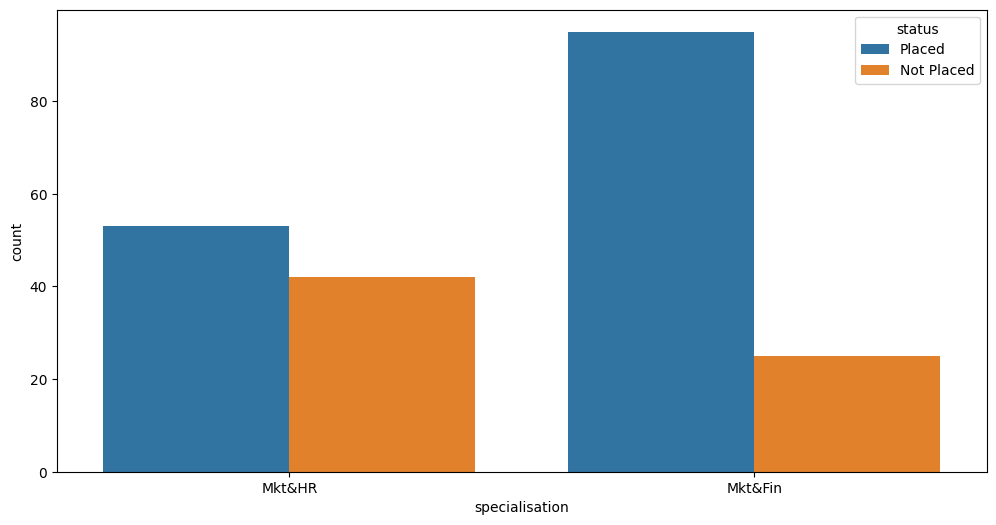

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
# Check that 'df' is a DataFrame and contains the expected columns
print(type(df))
print(df.columns)
# Pass the DataFrame to the 'data' argument
sns.countplot(x="specialisation", hue="status", data=df)
plt.show()

Marketing and Finance are the most demanded specialisation among the two specialisation according to the given data.

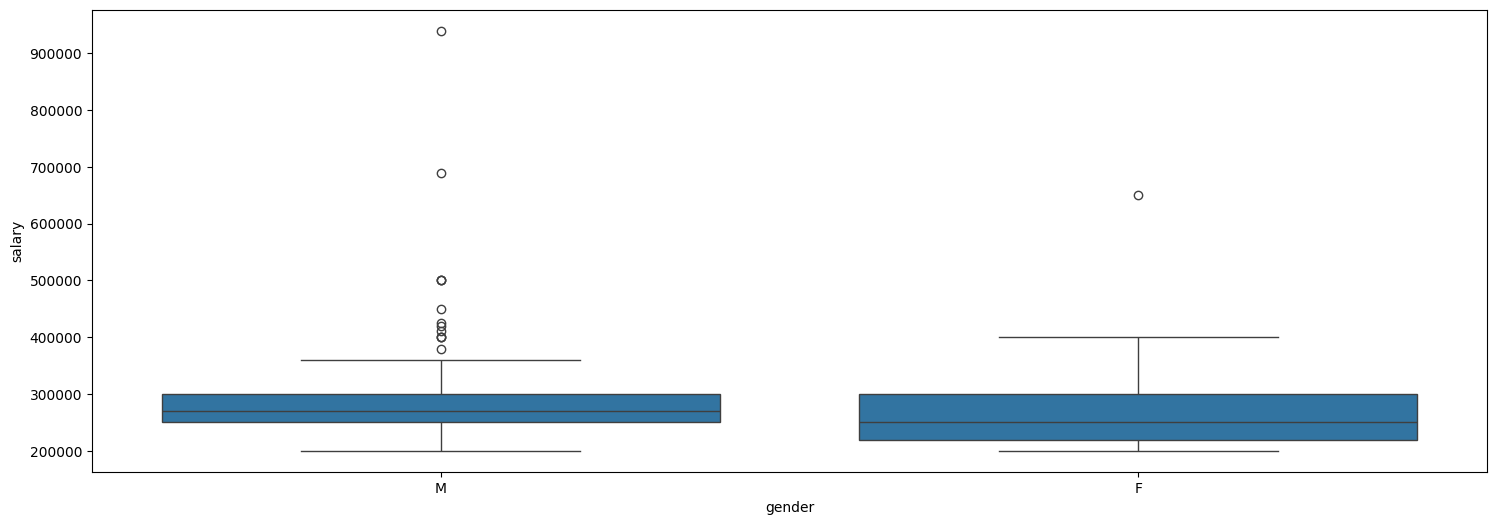

In [17]:
plt.figure(figsize =(18,6))
# Use keyword arguments to specify data and variables
sns.boxplot(x="gender", y="salary", data=df)
plt.show()

From the above box plot we can say that there is more no of outlier in Male students than Female students in terms of Salary.

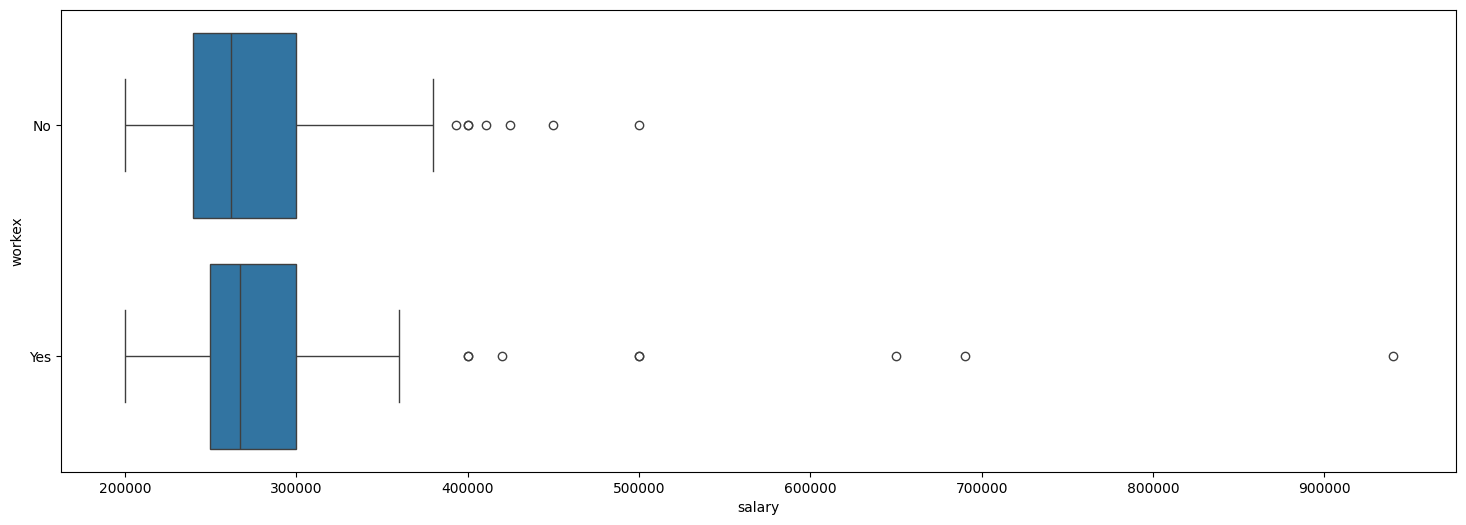

In [19]:
plt.figure(figsize =(18,6))
sns.boxplot(x="salary", y="workex", data=df) # Use x and y to specify variables, and data for the DataFrame
plt.show()

# **Classification**

In [20]:
df.drop("hsc_b",inplace=True,axis=1)
df.drop("ssc_b",inplace=True,axis=1)
df.drop("sl_no",inplace=True,axis=1)
X=df.iloc[:,:-2].values
Y=df.iloc[:,-2].values

In [21]:
X

array([['M', 67.0, 91.0, ..., 55.0, 'Mkt&HR', 58.8],
       ['M', 79.33, 78.33, ..., 86.5, 'Mkt&Fin', 66.28],
       ['M', 65.0, 68.0, ..., 75.0, 'Mkt&Fin', 57.8],
       ...,
       ['M', 67.0, 67.0, ..., 59.0, 'Mkt&Fin', 69.72],
       ['F', 74.0, 66.0, ..., 70.0, 'Mkt&HR', 60.23],
       ['M', 62.0, 58.0, ..., 89.0, 'Mkt&HR', 60.22]], dtype=object)

In [22]:
Y

array(['Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Not Placed',
       'Not Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Not Placed', 'Placed', 'Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Not Placed',
       'Placed', 'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
  

**Encoding the data **

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
X[:,3]=labelencoder_X.fit_transform(X[:,3])
X[:,0]=labelencoder_X.fit_transform(X[:,0])
X[:,5]=labelencoder_X.fit_transform(X[:,5])
X[:,6]=labelencoder_X.fit_transform(X[:,6])
X[:,8]=labelencoder_X.fit_transform(X[:,8])
Y=labelencoder_X.fit_transform(Y)

Train and Test Data split
Train = 60% of given data.
Test= 40% of the given data.

In [24]:
X

array([[1, 67.0, 91.0, ..., 55.0, 1, 58.8],
       [1, 79.33, 78.33, ..., 86.5, 0, 66.28],
       [1, 65.0, 68.0, ..., 75.0, 0, 57.8],
       ...,
       [1, 67.0, 67.0, ..., 59.0, 0, 69.72],
       [0, 74.0, 66.0, ..., 70.0, 1, 60.23],
       [1, 62.0, 58.0, ..., 89.0, 1, 60.22]], dtype=object)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4,random_state=0)

Standard Scaling of the data

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# *Decison Tree Classifier*

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_pred)
print(auc)

0.8010043942247334


In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        27
           1       0.87      0.90      0.88        59

    accuracy                           0.84        86
   macro avg       0.81      0.80      0.81        86
weighted avg       0.83      0.84      0.84        86



**Confusion Matrix**

In [29]:
print(confusion_matrix(Y_test,Y_pred))

[[19  8]
 [ 6 53]]


We can say that our model predict
* TP(Actual Yes and Predicted Yes)=51
* FP(Actual No and Predicted Yes)=7
* FN(Actual Yes and Predicted No) =8
* TN (Actual No and Predicted No) =20

In [30]:
accuracy_score(Y_test, Y_pred)

0.8372093023255814

**We have a pretty decent accuracy of 82 percentage.**

**Feature Importance**

In [31]:
imp=classifier.feature_importances_*100
Fec=pd.DataFrame(imp,columns=["Importance"])

Nam=["Gender","SSC %","HSC %","HSC Stream","Degree % ","Degree Stream",
              "Work Ex","Entrance %"," Specialisation","Mba %"]
Fec["Features"]=Nam
Fec.head(10)

,Importance,Features
0,2.390754,Gender
1,44.230523,SSC %
2,22.290098,HSC %
3,0.000000,HSC Stream
4,19.861808,Degree %
5,0.000000,Degree Stream
6,0.000000,Work Ex
7,4.070050,Entrance %
8,0.000000,Specialisation
9,7.156768,Mba %


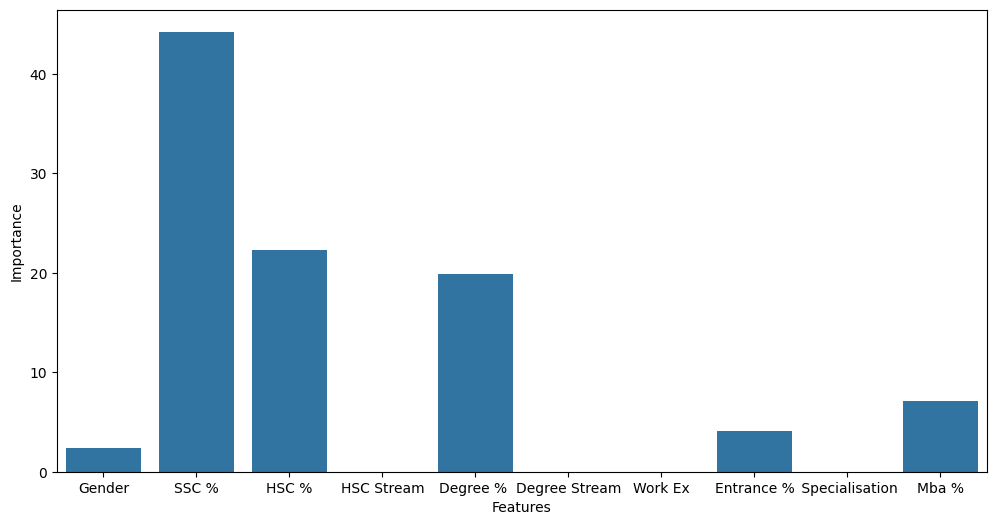

In [34]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(12,6))
# Pass data as a DataFrame and specify x and y columns
sns.barplot(x='Features', y='Importance', data=Fec)
plt.show()


 From the above bar chart we know that If we have a 5 percentage minimum confidence bound then,
     The important features which decide one probability of getting placed are- SSC%, HSC%, Degree%, MBA% .


# Random Forest Classification

In [35]:
from sklearn.ensemble import RandomForestClassifier
#Using Random Forest Algorithm
random_forest = RandomForestClassifier(n_estimators=30,random_state=0)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_pred)
print(auc)

0.7925298179535468


In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72        27
           1       0.87      0.88      0.87        59

    accuracy                           0.83        86
   macro avg       0.80      0.79      0.80        86
weighted avg       0.82      0.83      0.82        86



In [37]:
print(confusion_matrix(Y_test,Y_pred))

[[19  8]
 [ 7 52]]


We can say that our model predict
* TP(Actual Yes and Predicted Yes)=52
* FP(Actual No and Predicted Yes)=7
* FN(Actual Yes and Predicted No) =8
* TN (Actual No and Predicted No) =19

In [38]:
accuracy_score(Y_test, Y_pred)

0.8255813953488372

In [39]:
imp=random_forest.feature_importances_*100
Fec=pd.DataFrame(imp,columns=["Importance"])

Nam=["Gender","SSC %","HSC %","HSC Stream","Degree % ","Degree Stream",
              "Work Ex","Entrance %"," Specialisation","Mba %"]
Fec["Features"]=Nam
Fec.head(10)

,Importance,Features
0,2.358018,Gender
1,29.508432,SSC %
2,17.552528,HSC %
3,1.826846,HSC Stream
4,20.873260,Degree %
5,1.411492,Degree Stream
6,5.445663,Work Ex
7,8.617627,Entrance %
8,1.695787,Specialisation
9,10.710347,Mba %


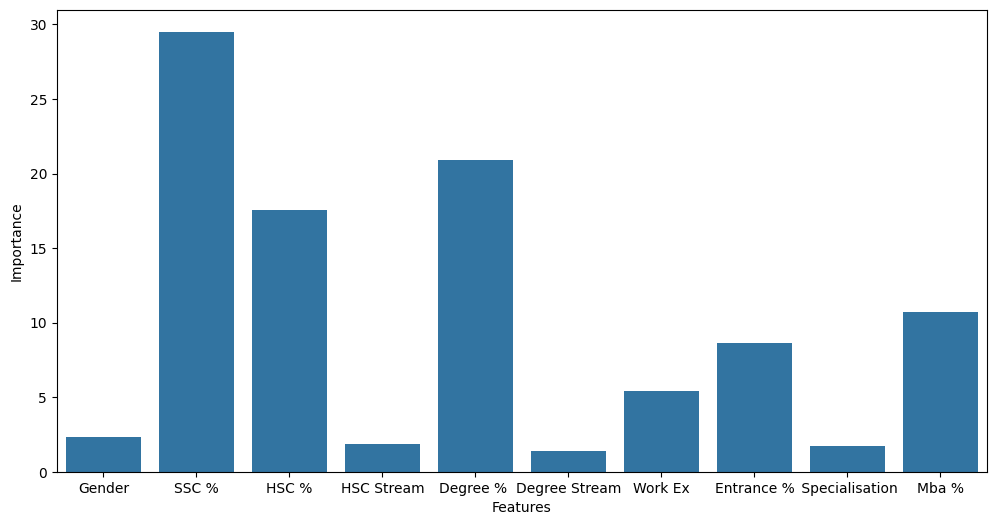

In [41]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(12,6))
sns.barplot(x='Features', y='Importance', data=Fec) # Pass data as a DataFrame and specify x and y columns
plt.show()

From the above bar chart we know that If we have a 5 percentage minimum confidence bound then, The important features which decide one probability of getting placed are- SSC%, HSC%, Degree%, MBA%, Work EX and Entrance % .